<a href="https://colab.research.google.com/github/YBharatiyadav/YBharatiyadav/blob/main/Spare_parts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_excel('/content/Spare parts.xlsx')

In [3]:
df.head()

,Material,Material Description,SLoc,Area,MvT,Doc_Date,Qty.,Amount
0,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-09-14,15.0,28.12
1,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-09-08,10.0,18.74
2,15,Plain Washer Din125 A10&5 A2,M2SH,KARAD,261,2016-08-12,8.0,15.00
3,15,Plain Washer Din125 A10&5 A2,M4P1,C'SHWAR STR,261,2016-08-06,10.0,18.75
4,15,Plain Washer Din125 A10&5 A2,M4P3,C'SHWAR STR,261,2016-08-06,10.0,18.75


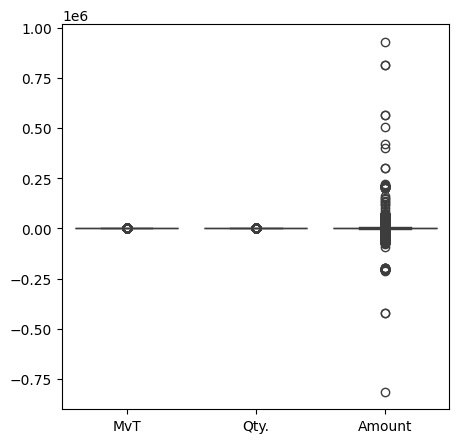

In [4]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df)
plt.show()

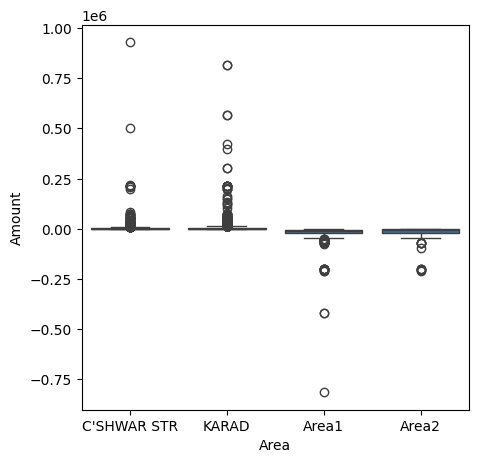

In [5]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df, x = 'Area', y = 'Amount')
plt.show()

In [6]:
out_3 = df[(df['Area'] == "Area1") & (df['Amount'] > -0.125)]

In [7]:
out_3.count()

,0
Material,23
Material Description,23
SLoc,23
Area,23
MvT,23
Doc_Date,23
Qty.,23
Amount,23


In [8]:
df = df.drop(out_3.index)

In [10]:
out_4 = df[(df['Area'] == "Area2") & (df['Amount'] > -0.125)]

In [11]:
out_4.count()

,0
Material,24
Material Description,24
SLoc,24
Area,24
MvT,24
Doc_Date,24
Qty.,24
Amount,24


In [12]:
df = df.drop(out_4.index)

In [13]:
df.columns

Index(['Material', 'Material Description', 'SLoc', 'Area', 'MvT', 'Doc_Date',
       'Qty.', 'Amount'],
      dtype='object')

In [14]:
# Convert Doc_Date to datetime format
df['Doc_Date'] = pd.to_datetime(df['Doc_Date'], format='%d-%m-%Y')

In [15]:
df['total_value'] = df['Qty.'] * df['Amount']

In [17]:
grouped_df = df.groupby('Material Description').agg({'Qty.': 'sum', 'total_value': 'sum'}).reset_index()

In [18]:
# Top 10 by quantity
top_10_by_quantity = grouped_df.sort_values(by='Qty.', ascending=False).head(10)

In [19]:
# Top 10 by value
top_10_by_value = grouped_df.sort_values(by='total_value', ascending=False).head(10)

In [24]:
def forecast_demand(data, material_desc, periods=12):
    material_data = data[data['Material Description'] == material_desc]
    material_data = material_data.set_index('Doc_Date')['Qty.'].resample('MS').sum()

    if len(material_data) < 12:
        print(f"Not enough data to forecast for Material Description '{material_desc}'")
        return []

    try:
        model = ARIMA(material_data, order=(5, 1, 0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=periods)
        return forecast
    except Exception as e:
        print(f"Error forecasting for Material Description '{material_desc}': {e}")
        return []

# Forecasting for each of the top 10 materials by quantity
forecasts = {}
for material_desc in top_10_by_quantity['Material Description']:
    forecasts[material_desc] = forecast_demand(df, material_desc)

Not enough data to forecast for Material Description 'Cable Tie Pa6.6 290Mm 4,8Mm Hr 145°C'


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Not enough data to forecast for Material Description 'Cable Tie Pa6.6 360Mm 4,5Mm Hr 145°C'
Not enough data to forecast for Material Description 'petrolium jelly for ABS'


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Not enough data to forecast for Material Description 'Cable Tie Pa6.6 160Mm 2,5Mm Hr 145°C'


In [25]:
# Forecasting for each of the top 10 materials by quantity
forecasts = {}
for material_desc in top_10_by_quantity['Material Description']:
    forecasts[material_desc] = forecast_demand(df, material_desc)

def calculate_min_max(data, material_desc):
    material_data = data[data['Material Description'] == material_desc]
    avg_monthly_demand = material_data['Qty.'].sum() / len(material_data['Doc_Date'].unique())
    safety_stock = avg_monthly_demand * 1.5  # Assuming 1.5 months of safety stock
    min_level = avg_monthly_demand
    max_level = avg_monthly_demand + safety_stock
    return min_level, max_level

# Calculating min-max levels for top 10 materials by quantity
min_max_levels = {}
for material_desc in top_10_by_quantity['Material Description']:
    min_max_levels[material_desc] = calculate_min_max(df, material_desc)

Not enough data to forecast for Material Description 'Cable Tie Pa6.6 290Mm 4,8Mm Hr 145°C'


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Not enough data to forecast for Material Description 'Cable Tie Pa6.6 360Mm 4,5Mm Hr 145°C'
Not enough data to forecast for Material Description 'petrolium jelly for ABS'


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Not enough data to forecast for Material Description 'Cable Tie Pa6.6 160Mm 2,5Mm Hr 145°C'


In [26]:
# Print results
print("Top 10 High Moving Spare Parts by Quantity:")
print(top_10_by_quantity)

Top 10 High Moving Spare Parts by Quantity:
                         Material Description    Qty.   total_value
67       Cable Tie Pa6.6 290Mm 4,8Mm Hr 145°C  7100.0  1.151162e+07
862  release for lubric. transm. blk 1/2 year  5584.0  7.972585e+06
802    lubrication transmitter, filled up red  5582.0  7.586256e+07
68       Cable Tie Pa6.6 360Mm 4,5Mm Hr 145°C  3402.0  7.056784e+06
828                   petrolium jelly for ABS  3295.6  1.012983e+06
69       Cable Tie Pa6.6 365Mm 7,8Mm Hr 145°C  2400.0  3.573569e+06
66       Cable Tie Pa6.6 200Mm 4,5Mm Hr 145°C  1800.0  6.402656e+05
882        service-report -english (memo pad)  1699.0  1.624883e+06
683                     coloured cotton Waste  1645.5  1.158525e+07
65       Cable Tie Pa6.6 160Mm 2,5Mm Hr 145°C  1460.0  3.256741e+05


In [ ]:
print("\nTop 10 High Moving Spare Parts by Value:")
print(top_10_by_value)


Top 10 High Moving Spare Parts by Value:
                         Material Description    Qty.   total_value
802    lubrication transmitter, filled up red  5582.0  7.586256e+07
683                     coloured cotton Waste  1645.5  1.158525e+07
67       Cable Tie Pa6.6 290Mm 4,8Mm Hr 145°C  7100.0  1.151162e+07
268        IGBT-module 1200V 400A MITSUBISHI®    74.0  9.980979e+06
862  release for lubric. transm. blk 1/2 year  5584.0  7.972585e+06
68       Cable Tie Pa6.6 360Mm 4,5Mm Hr 145°C  3402.0  7.056784e+06
550        Slip Ring Unit  V2 E53 No Attachm.     5.0  6.840473e+06
34    Cable 1X185MM² aluminium Green / yellow   270.0  5.721717e+06
624    battery lead- free of maint. 12V 1,3Ah   193.0  5.190675e+06
321  PCB Capacitor board V1.0 W.Nesscap WW-53   127.0  4.813562e+06


In [27]:
print("\nForecasted Demand for Next Year (Quantity per Month):")
for material_desc, forecast in forecasts.items():
    if len(forecast) > 0:
        print(f"Material Description '{material_desc}': {forecast}")


Forecasted Demand for Next Year (Quantity per Month):
Material Description 'release for lubric. transm. blk 1/2 year': 2016-10-01    -45.809836
2016-11-01    611.115122
2016-12-01    598.708220
2017-01-01    345.341390
2017-02-01    590.911862
2017-03-01    346.488040
2017-04-01    -76.416429
2017-05-01    534.848703
2017-06-01    556.102926
2017-07-01    359.524083
2017-08-01    653.019104
2017-09-01    412.132473
Freq: MS, Name: predicted_mean, dtype: float64
Material Description 'lubrication transmitter, filled up red': 2016-10-01    -45.403367
2016-11-01    610.951713
2016-12-01    578.581887
2017-01-01    360.670342
2017-02-01    594.875114
2017-03-01    346.516272
2017-04-01    -73.674040
2017-05-01    535.510467
2017-06-01    528.796539
2017-07-01    372.846088
2017-08-01    660.616137
2017-09-01    412.816092
Freq: MS, Name: predicted_mean, dtype: float64
Material Description 'Cable Tie Pa6.6 365Mm 7,8Mm Hr 145°C': 2016-10-01     -2.165545
2016-11-01     98.261583
2016-12-01  

In [28]:
print("\nIdeal Min-Max Levels:")
for material_desc, (min_level, max_level) in min_max_levels.items():
    print(f"Material Description '{material_desc}': Min Level = {min_level}, Max Level = {max_level}")


Ideal Min-Max Levels:
Material Description 'Cable Tie Pa6.6 290Mm 4,8Mm Hr 145°C': Min Level = 443.75, Max Level = 1109.375
Material Description 'release for lubric. transm. blk 1/2 year': Min Level = 37.729729729729726, Max Level = 94.32432432432432
Material Description 'lubrication transmitter, filled up red': Min Level = 37.46308724832215, Max Level = 93.65771812080536
Material Description 'Cable Tie Pa6.6 360Mm 4,5Mm Hr 145°C': Min Level = 117.3103448275862, Max Level = 293.2758620689655
Material Description 'petrolium jelly for ABS': Min Level = 1647.8, Max Level = 4119.5
Material Description 'Cable Tie Pa6.6 365Mm 7,8Mm Hr 145°C': Min Level = 171.42857142857142, Max Level = 428.57142857142856
Material Description 'Cable Tie Pa6.6 200Mm 4,5Mm Hr 145°C': Min Level = 257.14285714285717, Max Level = 642.8571428571429
Material Description 'service-report -english (memo pad)': Min Level = 424.75, Max Level = 1061.875
Material Description 'coloured cotton Waste': Min Level = 31.6442307

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cable Tie Pa6.6 290Mm 4,8Mm Hr 145°C'),
  Text(1, 0, 'release for lubric. transm. blk 1/2 year'),
  Text(2, 0, 'lubrication transmitter, filled up red'),
  Text(3, 0, 'Cable Tie Pa6.6 360Mm 4,5Mm Hr 145°C'),
  Text(4, 0, 'petrolium jelly for ABS'),
  Text(5, 0, 'Cable Tie Pa6.6 365Mm 7,8Mm Hr 145°C'),
  Text(6, 0, 'Cable Tie Pa6.6 200Mm 4,5Mm Hr 145°C'),
  Text(7, 0, 'service-report -english (memo pad)'),
  Text(8, 0, 'coloured cotton Waste'),
  Text(9, 0, 'Cable Tie Pa6.6 160Mm 2,5Mm Hr 145°C')])

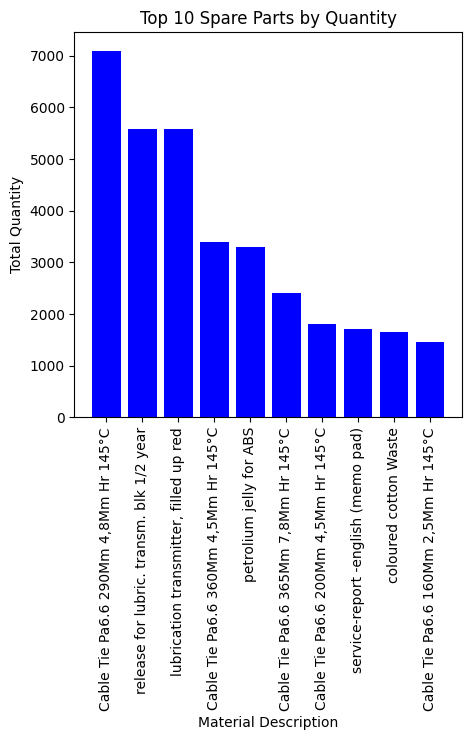

In [29]:
# Bar chart for top 10 by quantity
plt.figure(figsize=(5,5))
plt.bar(top_10_by_quantity['Material Description'], top_10_by_quantity['Qty.'], color='blue')
plt.title('Top 10 Spare Parts by Quantity')
plt.xlabel('Material Description')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'lubrication transmitter, filled up red'),
  Text(1, 0, 'coloured cotton Waste'),
  Text(2, 0, 'Cable Tie Pa6.6 290Mm 4,8Mm Hr 145°C'),
  Text(3, 0, 'IGBT-module 1200V 400A MITSUBISHI®'),
  Text(4, 0, 'release for lubric. transm. blk 1/2 year'),
  Text(5, 0, 'Cable Tie Pa6.6 360Mm 4,5Mm Hr 145°C'),
  Text(6, 0, 'Slip Ring Unit  V2 E53 No Attachm.'),
  Text(7, 0, 'Cable 1X185MM² aluminium Green / yellow'),
  Text(8, 0, 'battery lead- free of maint. 12V 1,3Ah'),
  Text(9, 0, 'PCB Capacitor board V1.0 W.Nesscap WW-53')])

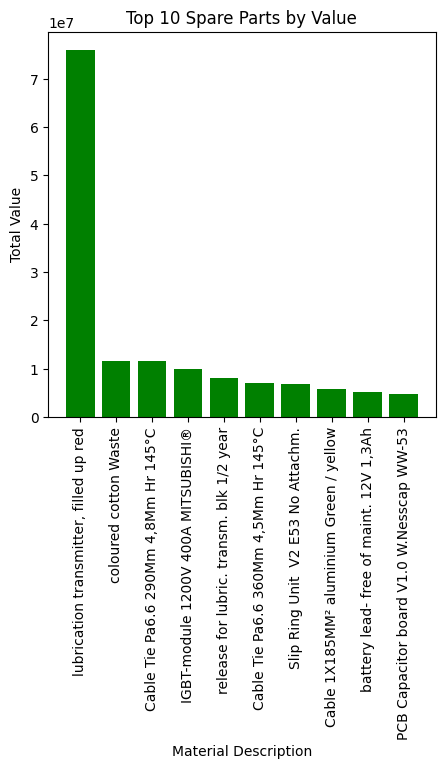

In [30]:
# Bar chart for top 10 by value
plt.figure(figsize=(5,5))
plt.bar(top_10_by_value['Material Description'], top_10_by_value['total_value'], color='green')
plt.title('Top 10 Spare Parts by Value')
plt.xlabel('Material Description')
plt.ylabel('Total Value')
plt.xticks(rotation=90)


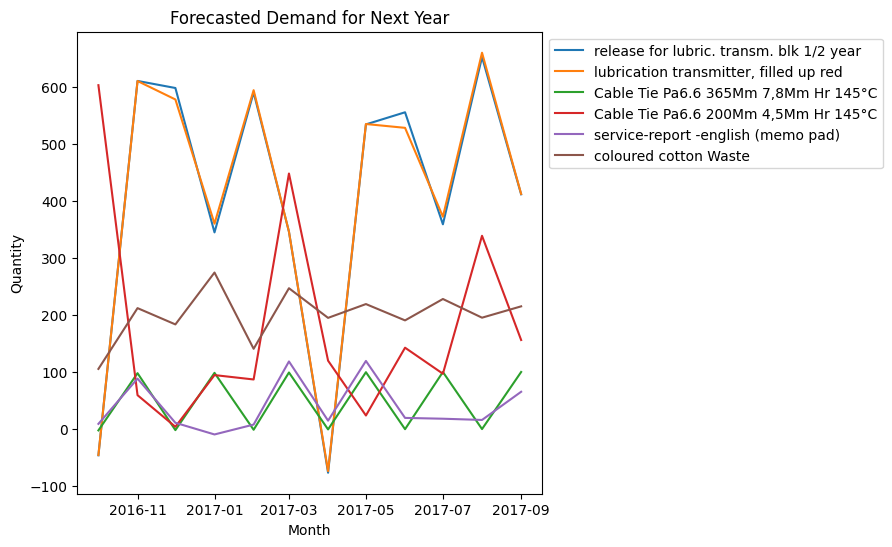

In [40]:
plt.figure(figsize=(6,6))
for material_desc, forecast in forecasts.items():
    if len(forecast) > 0:
        plt.plot(forecast, label=f'{material_desc}')
plt.title('Forecasted Demand for Next Year')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

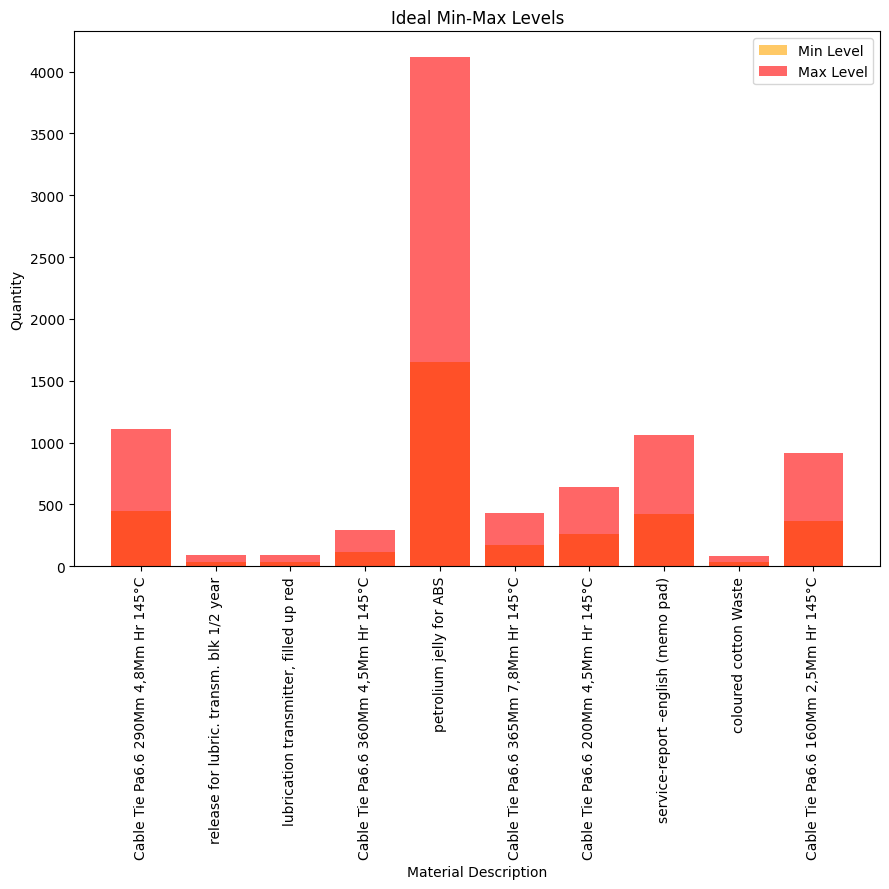

In [32]:
plt.figure(figsize=(9,9))
materials_desc = list(min_max_levels.keys())
min_levels = [min_max_levels[m][0] for m in materials_desc]
max_levels = [min_max_levels[m][1] for m in materials_desc]
plt.bar(materials_desc, min_levels, color='orange', alpha=0.6, label='Min Level')
plt.bar(materials_desc, max_levels, color='red', alpha=0.6, label='Max Level')
plt.title('Ideal Min-Max Levels')
plt.xlabel('Material Description')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()